,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,male,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,female,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,female,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,female,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,male,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   object 
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

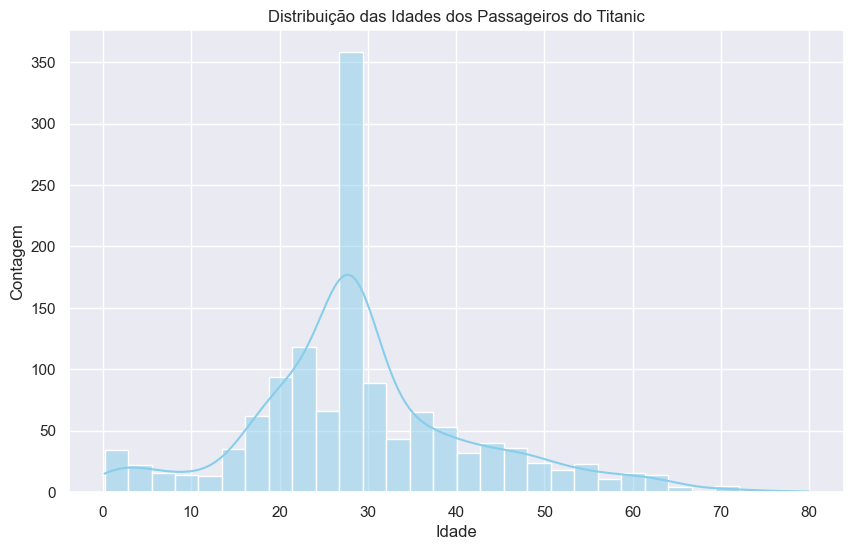

C:\Users\2devt\AppData\Local\Temp\ipykernel_20124\813123486.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Pclass", y="Fare", palette="Set2")


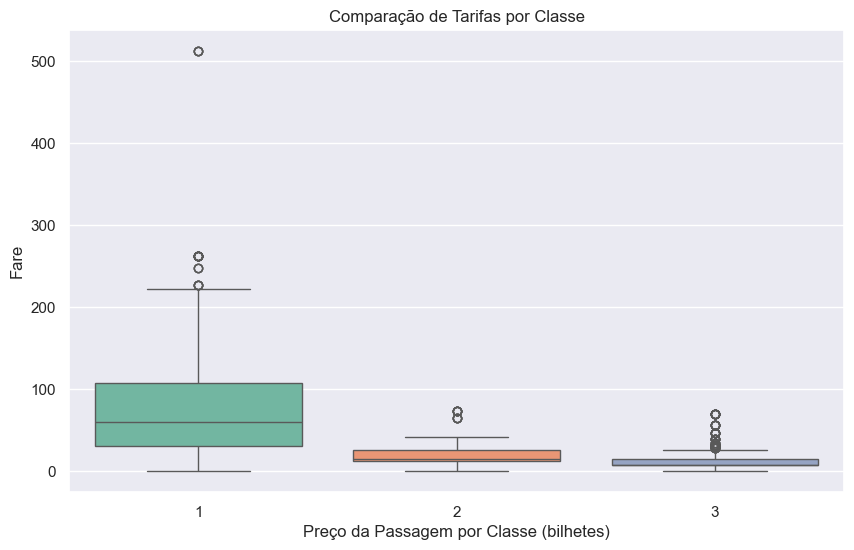

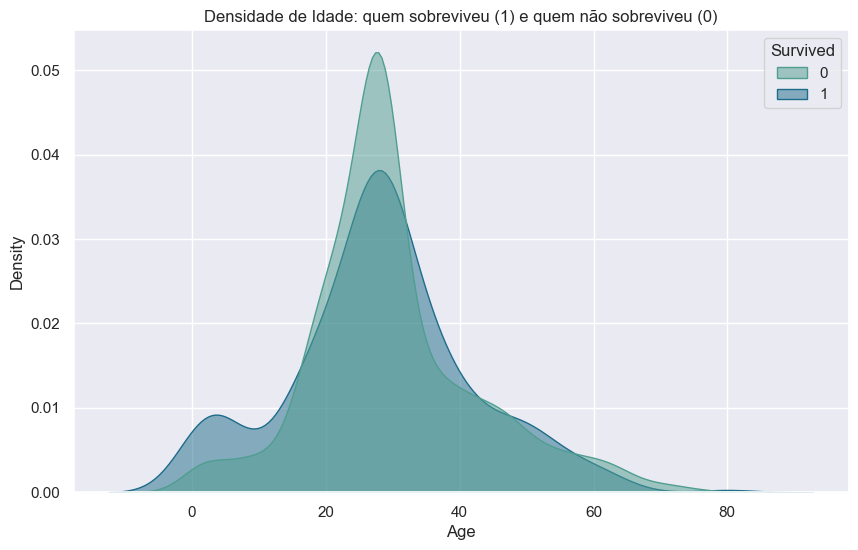

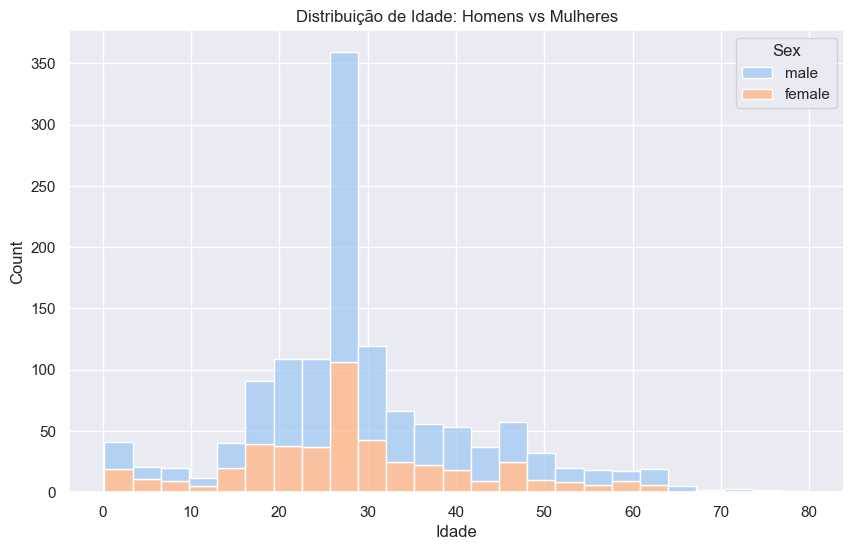

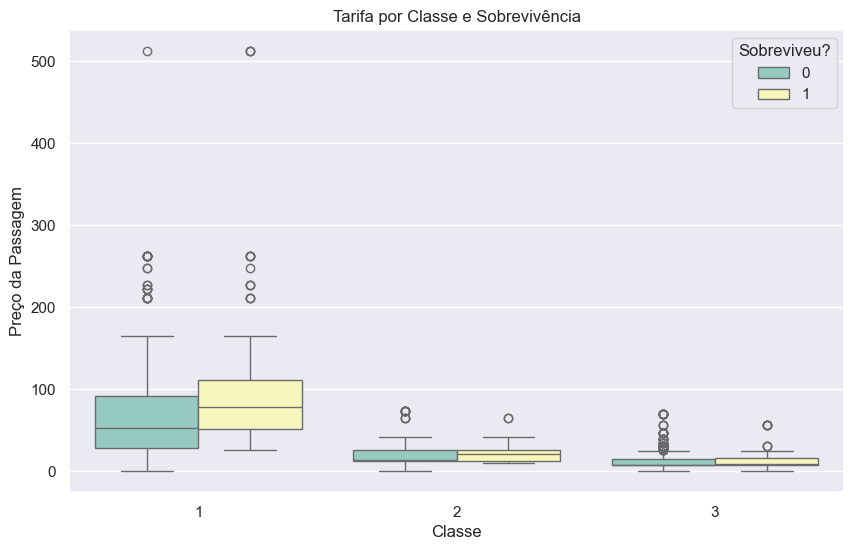

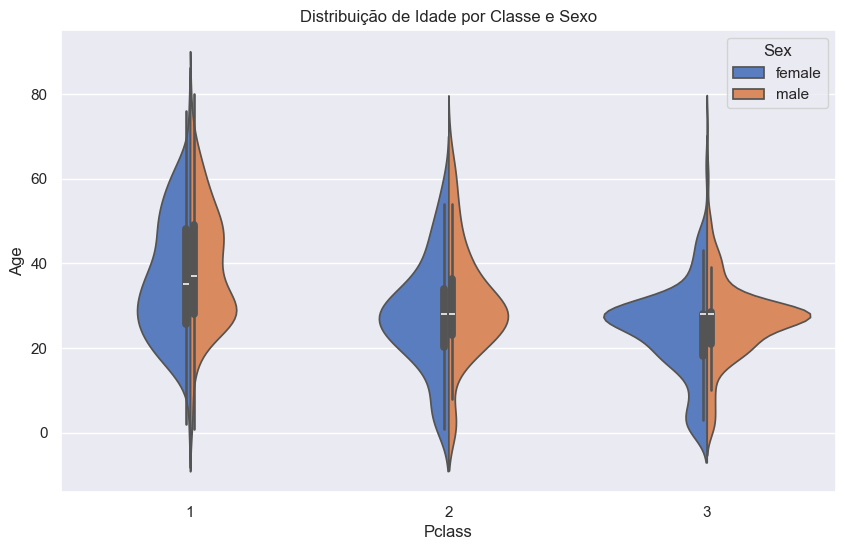

In [8]:
# Para rodar a aplicação
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configuração visual
sns.set_theme(style="darkgrid")

# carregar base de dados
# Como o arquivo está na mesma pasta basta colocar o nome
df = pd.read_csv("Titanic.csv")

# Normalizar/ajustar nomes e valores para evitar erros nos plots
# Se o arquivo tem a coluna '2urvived', renomeia para 'Survived'
if '2urvived' in df.columns:
	df.rename(columns={'2urvived': 'Survived'}, inplace=True)

# Se 'Sex' estiver codificado como 0/1, converte para labels legíveis
if 'Sex' in df.columns and not pd.api.types.is_object_dtype(df['Sex']):
	df['Sex'] = df['Sex'].map({0: 'male', 1: 'female'})

# mostra as 5 primeiras linhas
display(df.head())
# DCIA: No VS Code, use 'siplay()' ao inves de print() para tabelas bonitas


# Verificando tipos de dados e nulos
df.info()

# Análise da idade
plt.figure(figsize=(10, 6))

# usar histplot para distribuição (boxplot não aceita 'bins' nem 'kde')
sns.histplot(data=df, x="Age", bins=30, kde=True, color="skyblue")
plt.title("Distribuição das Idades dos Passageiros do Titanic")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

# Comparação de tarifa por Classe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Pclass", y="Fare", palette="Set2")
plt.title("Comparação de Tarifas por Classe")
plt.xlabel('Preço da Passagem por Classe (bilhetes)')
plt.show()

# Apenas Linha de densidade (Sem barras)
plt.figure(figsize=(10, 6))
# agora usamos a coluna 'Survived' (renomeada acima se necessário)
hue_col = "Survived" if "Survived" in df.columns else None
if hue_col:
	sns.kdeplot(data=df, x="Age", hue=hue_col, fill=True, common_norm=False, palette="crest", alpha=0.5)
	plt.title("Densidade de Idade: quem sobreviveu (1) e quem não sobreviveu (0)")
else:
	sns.kdeplot(data=df, x="Age", fill=True, common_norm=False, palette="crest", alpha=0.5)
	plt.title("Densidade de Idade")
plt.show()

# Histograma de sobreviventes por sexo
plt.figure(figsize=(10, 6))
# corrigido 'multiple' de "stak" para "stack"
sns.histplot(data=df, x="Age", hue="Sex", multiple="stack", bins=25, palette="pastel")
plt.title("Distribuição de Idade: Homens vs Mulheres")
plt.xlabel("Idade")
plt.show()

#preço x Classe, Separado por sobrevivência
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Pclass", y="Fare", hue="Survived", palette="Set3")
plt.title("Tarifa por Classe e Sobrevivência")
plt.xlabel("Classe")
plt.ylabel("Preço da Passagem")
plt.legend(title="Sobreviveu?")
plt.show()

#violinplot: A evolução do box plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Pclass", y="Age", split=True, hue="Sex", palette="muted")
plt.title("Distribuição de Idade por Classe e Sexo")
plt.show()